In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    'font.size':16,
    'figure.figsize':(8,8),
    'text.usetex':True
})

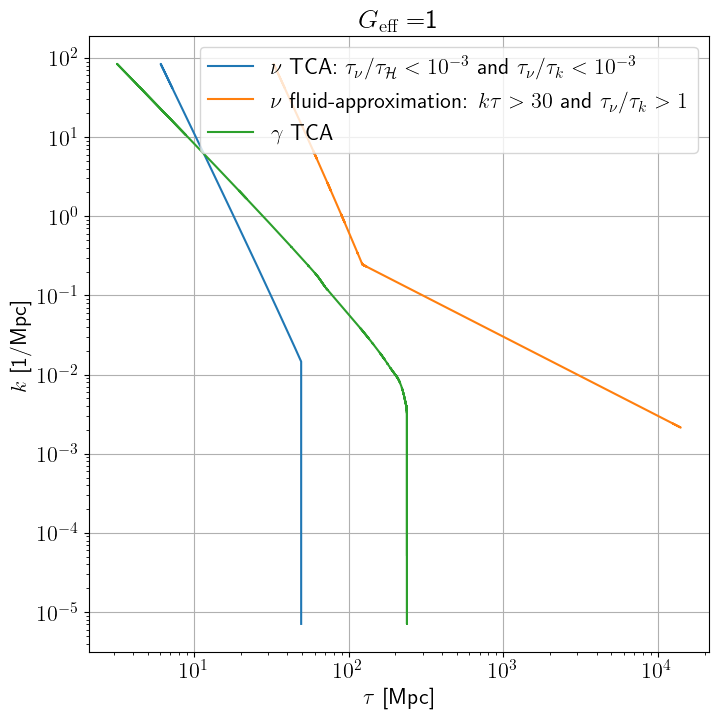

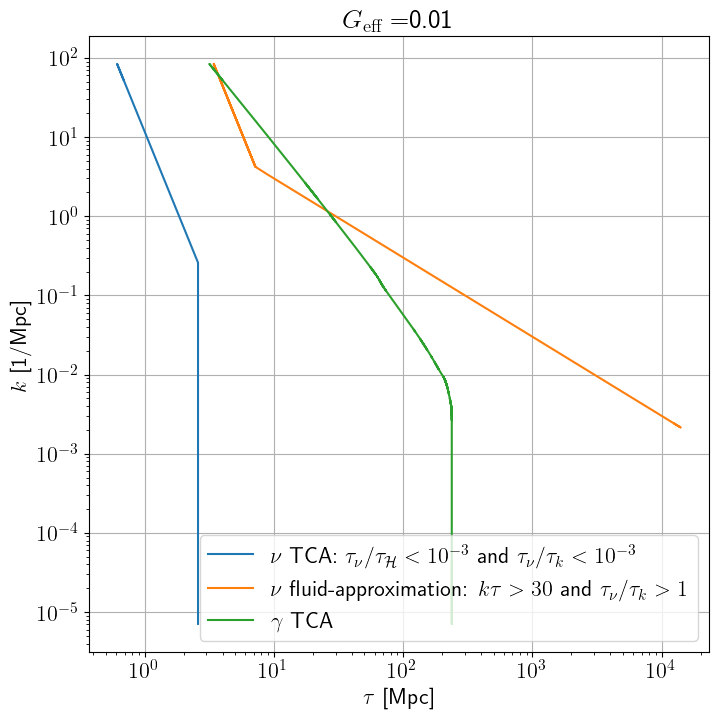

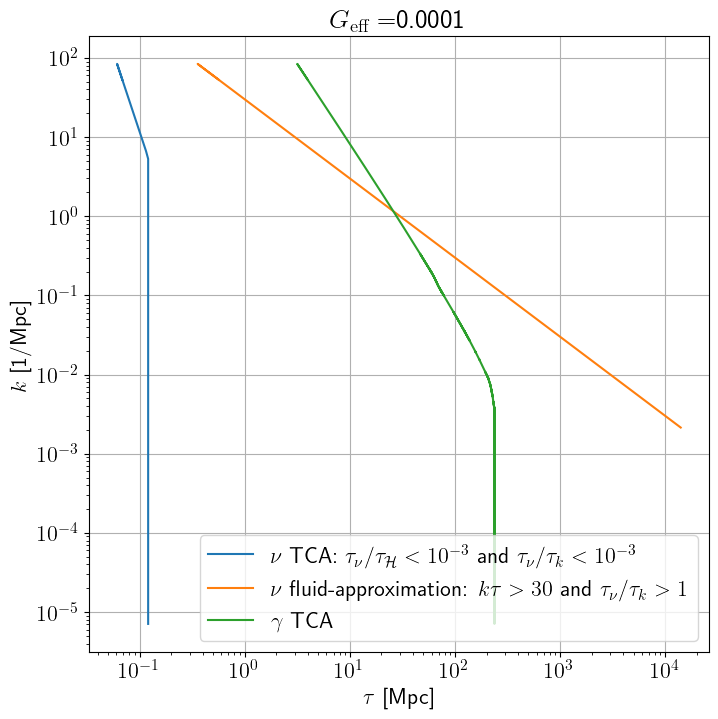

In [19]:
for G_eff in ['1','001','00001']:
    with open('ta_G_'+G_eff+'.txt') as f:
        lines = [line.rstrip() for line in f]
        
    icount = 0
    for gs in G_eff:
        if gs=='0': icount+=1
        
    G_eff_value = 10**(-icount)

    ur_tca_k = []
    ur_tca_tau = []

    ncdm_tca_k = []
    ncdm_tca_tau = []

    ur_fa_k = []
    ur_fa_tau = []

    ncdm_fa_k = []
    ncdm_fa_tau = []

    tca_k = []
    tca_tau = []

    for line in lines:
        if 'switch off ur tight-coupling' in line:
            # ur_tca_line = line.split()
            k = line.split()[1].split(':')[0].split('=')[1]
            tau = line.split()[-1].split('=')[1]
            ur_tca_k.append(float(k))
            ur_tca_tau.append(float(tau))
        if 'switch off ncdm tight-coupling' in line:
            # ur_tca_line = line.split()
            k = line.split()[1].split(':')[0].split('=')[1]
            tau = line.split()[-1].split('=')[1]
            ncdm_tca_k.append(float(k))
            ncdm_tca_tau.append(float(tau))
        if 'switch on ur fluid approximation' in line:
            # ur_tca_line = line.split()
            k = line.split()[1].split(':')[0].split('=')[1]
            tau = line.split()[-1].split('=')[1]
            ur_fa_k.append(float(k))
            ur_fa_tau.append(float(tau))
        if 'switch on ncdm fluid approximation' in line:
            # ur_tca_line = line.split()
            k = line.split()[1].split(':')[0].split('=')[1]
            tau = line.split()[-1].split('=')[1]
            ncdm_fa_k.append(float(k))
            ncdm_fa_tau.append(float(tau))
        if 'switch off tight-coupling' in line:
            # ur_tca_line = line.split()
            k = line.split()[1].split(':')[0].split('=')[1]
            tau = line.split()[-1].split('=')[1]
            tca_k.append(float(k))
            tca_tau.append(float(tau))
            
    fig, ax = plt.subplots(1,1)

    ax.grid()

    ax.loglog(ur_tca_tau,ur_tca_k,label=r'$\nu$ TCA: $\tau_{\nu}/\tau_{\mathcal{H}} < 10^{-3}$ and $\tau_{\nu}/\tau_{k} < 10^{-3}$')
    ax.loglog(ur_fa_tau,ur_fa_k,label=r'$\nu$ fluid-approximation: $k\tau > 30$ and $\tau_{\nu}/\tau_{k} > 1$')

    ax.loglog(tca_tau,tca_k,label=r'$\gamma$ TCA')

    ax.legend(loc=0)

    ax.set_title('$G_{\mathrm{eff}} = $%.4g'%G_eff_value)
    ax.set_ylabel(r'$k$ [1/Mpc]')
    ax.set_xlabel(r'$\tau$ [Mpc]')